In [66]:
import re
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from llsdollar import LlsDollar
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


Load Data

In [86]:
data = pd.read_csv("data/Dollar_Rial_Price_Dataset.csv")
data.head()

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close
0,0,11/27/2011,1390/09/06,"13,700","13,700","13,700","13,700"
1,1,11/28/2011,1390/09/07,"13,440","13,440","13,440","13,440"
2,2,11/29/2011,1390/09/08,"13,350","13,350","13,350","13,350"
3,3,11/30/2011,1390/09/09,"13,400","13,400","13,400","13,400"
4,4,12/1/2011,1390/09/10,"13,500","13,500","13,500","13,500"


Preprocessing data


In [68]:
data['Date'] = pd.to_datetime(data['Date'])

for colse in ["Open", "Low", "High", "Close"]:
    data[colse] = data[colse].apply(lambda x: re.sub(',', '', x))
    data[colse] = data[colse].astype(float)
    
data['Date_Number'] = data['Date'].map(lambda date: 10000*date.year + 100*date.month + date.day)
data.drop(['Persian_Date'], axis=1, inplace=True)
data.head()

,Unnamed: 0,Date,Open,Low,High,Close,Date_Number
0,0,2011-11-27,13700.0,13700.0,13700.0,13700.0,20111127
1,1,2011-11-28,13440.0,13440.0,13440.0,13440.0,20111128
2,2,2011-11-29,13350.0,13350.0,13350.0,13350.0,20111129
3,3,2011-11-30,13400.0,13400.0,13400.0,13400.0,20111130
4,4,2011-12-01,13500.0,13500.0,13500.0,13500.0,20111201


Ahmadi Nejad

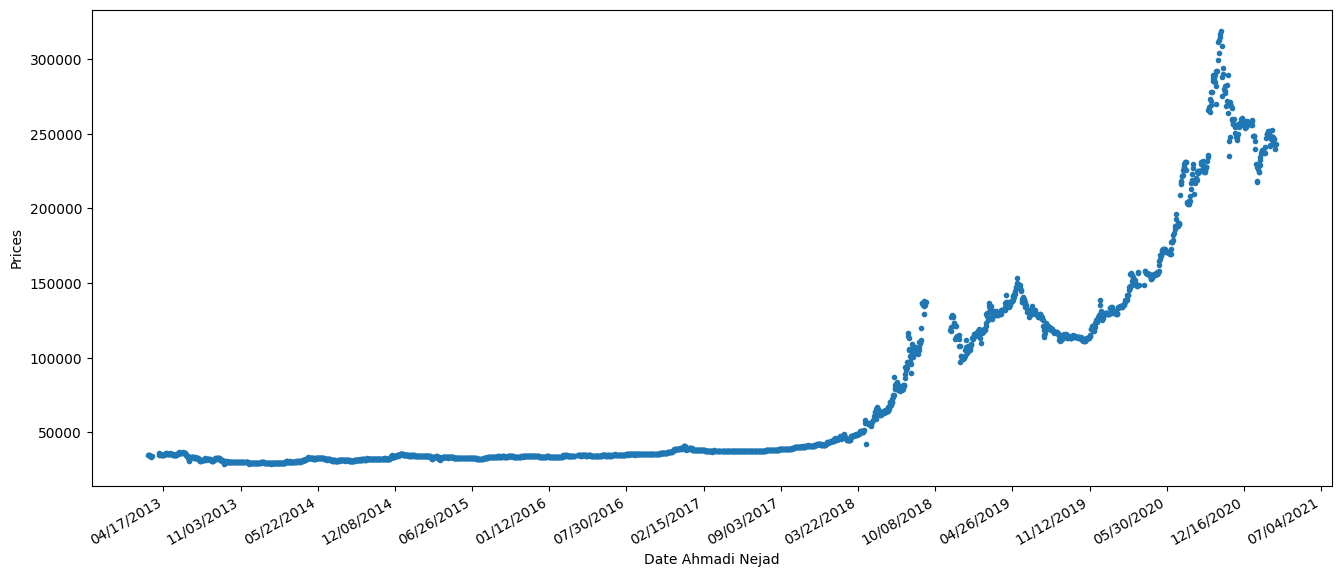

In [85]:
Ahmadi_Nejad= data[(data['Date'] > '2013-03-08') & (data['Date'] <= '2021-03-08')].reset_index(drop=True)
plt.figure(figsize=(16, 7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=200))
plt.scatter(Ahmadi_Nejad["Date"], Ahmadi_Nejad["Close"], marker='.')
plt.xlabel("Date Ahmadi Nejad")
plt.ylabel("Prices")
plt.gcf().autofmt_xdate()
plt.show()


Ahmadi Nejad Train Data

In [78]:
X = np.array(Ahmadi_Nejad[["Date_Number"]])
Y = np.array(Ahmadi_Nejad[["Close"]])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

lls = LlsDollar()
lls.fit(X_train, Y_train)
MAE = lls.evaluate(X_test, Y_test, loss="MAE")
print("Ahmadi Nejad : Loss : MAE", round(MAE), "Rial", round(MAE/10), "Toman")

Ahmadi Nejad : Loss : MAE 53574 Rial 5357 Toman


Hassan Rouhani

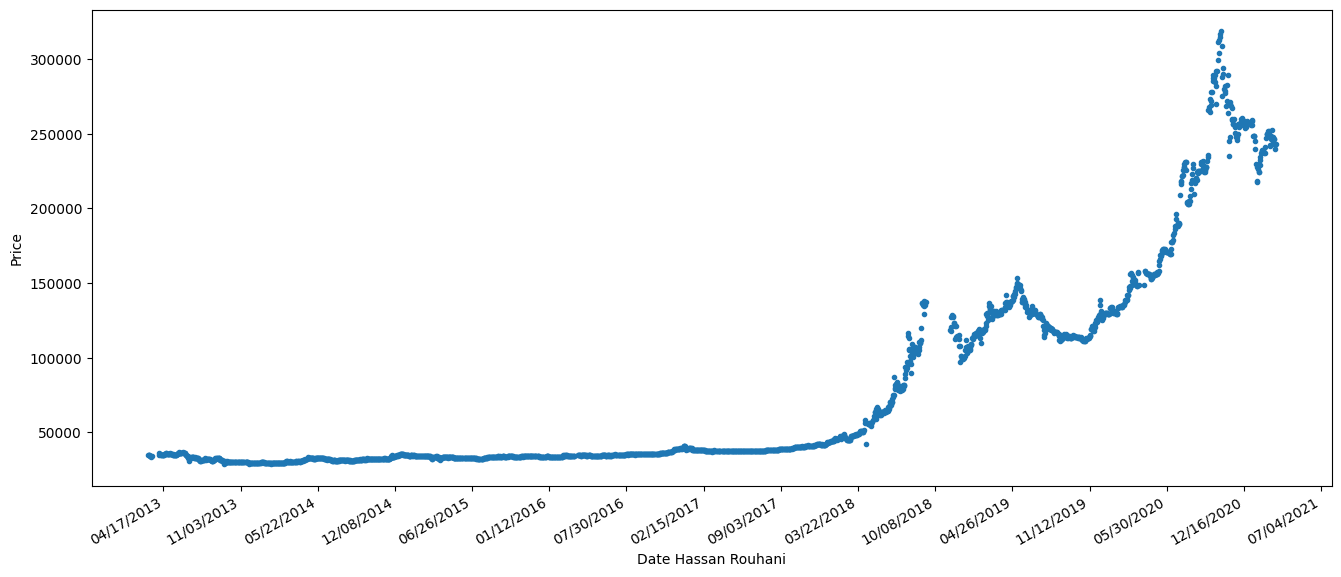

In [83]:
Hassan_Rouhani= data[(data['Date'] > '2013-03-08') & (data['Date'] <= '2021-03-08')].reset_index(drop=True)
plt.figure(figsize=(16, 7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=200))
plt.scatter(Hassan_Rouhani["Date"], Hassan_Rouhani["Close"], marker='.')
plt.xlabel("Date Hassan Rouhani")
plt.ylabel("Price")
plt.gcf().autofmt_xdate()
plt.show()


Hassan Rouhani Train Data

In [77]:
X = np.array(Hassan_Rouhani[["Date_Number"]])
Y = np.array(Hassan_Rouhani[["Close"]])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

lls = LlsDollar()
lls.fit(X_train, Y_train)
MAE = lls.evaluate(X_test, Y_test, loss="MAE")
print("Hassan Rouhani : Loss : MAE", round(MAE), "Rial", round(MAE/10), "Toman")

Hassan Rouhani : Loss : MAE 53277 Rial 5328 Toman


Ebrahim Raisi

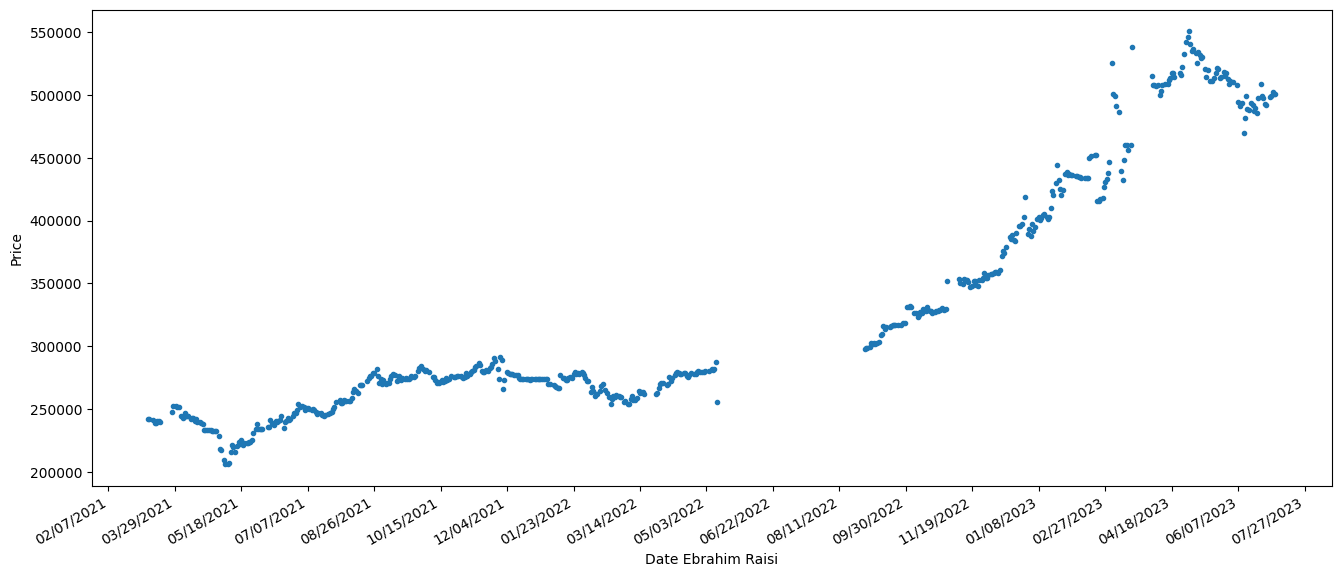

In [84]:
Ebrahim_Raisi = data[(data['Date'] > '2021-03-08')].reset_index(drop=True)

plt.figure(figsize=(16, 7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))

plt.scatter(Ebrahim_Raisi["Date"], Ebrahim_Raisi["Close"], marker='.')
plt.xlabel("Date Ebrahim Raisi")
plt.ylabel("Price")
plt.gcf().autofmt_xdate()
plt.show()


Ebrahim Raisi Train Data

In [79]:
X = np.array(Ebrahim_Raisi[["Date_Number"]])
Y = np.array(Ebrahim_Raisi[["Close"]])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

lls = LlsDollar()
lls.fit(X_train, Y_train)
MAE = lls.evaluate(X_test, Y_test, loss="MAE")
print("Ebrahim Raisi : Loss : MAE", round(MAE, 2), "Rial", round(MAE/10), "Toman")

Ebrahim Raisi : Loss : MAE 85682.01 Rial 8568 Toman
